## Predicting faulty water pumps

Loading necessary libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', 50)
#np.set_printoptions(threshold=100)

Loading necessary feature values for data and insepcting it 

In [2]:
data = pd.read_csv("data/train features.csv")
labels =pd.read_csv("data/train labels.csv")

In [3]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
print(labels.head())
print(labels.shape)
print(data.shape)

      id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
(59400, 2)
(59400, 40)


In [5]:
data = data.merge(labels, on='id', how='inner')

Seems like there are 40 columns

In [6]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

So the data has 59400 entries and 41 columns. Now it's time to inspect the columns and data

### Exploration & Cleaning of categorical variables

#### Removing unnnecssary columns

In [7]:
np.unique(data.status_group,return_counts=True)

(array(['functional', 'functional needs repair', 'non functional'],
       dtype=object), array([32259,  4317, 22824]))

In [8]:

np.unique(data.wpt_name, return_counts = True)[1].shape[0]


37400

So there are 37400 unique wpt names in the training set. 

Categorizing based on 37400 unique names does not make sense; plus intuitively names of water pumps will not seem to have a relationship to their faultiness.

So removing wpt_name column

In [9]:
data =data.drop('wpt_name', axis =1)

In [10]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [11]:
data["funder"] = data["funder"].astype('str')
print(np.unique(data.funder, return_counts=True))

(np.unique(data.funder, return_counts=True))[0].shape[0]

(array(['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia',
       'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe', 'Abdul',
       'Abood', 'Abs', 'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act',
       'Act Mara', 'Action Aid', 'Action Contre La Faim', 'Action In A',
       'Adap', 'Adb', 'Adf', 'Adp', 'Adp Bungu', 'Adp Mombo', 'Adp/w',
       'Adra', 'Af', 'Afdp', 'Afric', 'Africa',
       'Africa 2000 Network/undp', 'Africa Amini Alama',
       'Africa Project Ev Germany', 'African', 'African 2000 Network',
       'African Barrick Gold', 'African Development Bank',
       'African Development Foundation', 'African Muslim Agency',
       'African Realief Committe Of Ku', 'African Reflections Foundation',
       'African Relie', 'Africaone Ltd', 'Africare', 'Afriican Reli',
       'Afroz Ismail', 'Afya Department Lindi Rural', 'Agape Churc',
       'Agt Church', 'Ahmadia', 'Ai', 'Aic', 'Aic Church', 'Aic Kij',
       'Aict', 'Aimgold', 'Aixos', 'Alia', 'Ambwene Mwaikek', 'Am

1898

So there are 1898 unique funders. 

In [13]:
(np.unique(data.funder, return_counts=True))

(array(['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia',
        'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe', 'Abdul',
        'Abood', 'Abs', 'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act',
        'Act Mara', 'Action Aid', 'Action Contre La Faim', 'Action In A',
        'Adap', 'Adb', 'Adf', 'Adp', 'Adp Bungu', 'Adp Mombo', 'Adp/w',
        'Adra', 'Af', 'Afdp', 'Afric', 'Africa',
        'Africa 2000 Network/undp', 'Africa Amini Alama',
        'Africa Project Ev Germany', 'African', 'African 2000 Network',
        'African Barrick Gold', 'African Development Bank',
        'African Development Foundation', 'African Muslim Agency',
        'African Realief Committe Of Ku', 'African Reflections Foundation',
        'African Relie', 'Africaone Ltd', 'Africare', 'Afriican Reli',
        'Afroz Ismail', 'Afya Department Lindi Rural', 'Agape Churc',
        'Agt Church', 'Ahmadia', 'Ai', 'Aic', 'Aic Church', 'Aic Kij',
        'Aict', 'Aimgold', 'Aixos', 'Alia', 'Ambwene

In [14]:
np.unique((np.unique(data.funder, return_counts=True)[1]), return_counts=True)

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   56,
          57,   59,   61,   62,   63,   67,   68,   69,   70,   72,   78,
          80,   81,   82,   84,   85,   86,   87,   88,   92,   97,  101,
         102,  105,  106,  107,  108,  110,  111,  116,  117,  119,  121,
         122,  123,  124,  125,  126,  128,  131,  134,  137,  145,  147,
         150,  152,  155,  158,  165,  166,  170,  173,  175,  176,  180,
         181,  186,  189,  195,  198,  213,  219,  230,  234,  241,  259,
         260,  263,  270,  275,  280,  295,  301,  312,  316,  321,  333,
         359,  393,  425,  442,  448,  450,  470,  484,  583,  590,  602,
         610,  765,  777,  811,  826, 

So within unique ones, we have 3635 as Nulls, and 777 as 0s. 
Also out of unique funders 974 have occurrences each one time. So it does not make sense to use this information for modeling the predictions of faultiness. As it has multiple cateogrical names.So removing funders columnn as well. 

In [15]:
data = data.drop('funder', axis =1)


In [16]:
data.head()

,id,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,World vision,37.460664,-3.821329,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [19]:
data['installer']= data['installer'].astype('str')

np.unique(data.installer, return_counts=True)

(array(['-', '0', 'A.D.B', 'AAR', 'ABASIA', 'ABD', 'ABDALA', 'ABDUL', 'AC',
        'ACORD', 'ACRA', 'ACT', 'ACT MARA', 'ACTION AID', 'ACTIVE TANK CO',
        'ACTIVE TANK CO LTD', 'AD', 'ADAP', 'ADB', 'ADP', 'ADP Busangi',
        'ADRA', 'ADRA /Government', 'ADRA/Government', 'AF', 'AFRICA',
        'AFRICA MUSLIM', 'AFRICAN DEVELOPMENT FOUNDATION',
        'AFRICAN REFLECTIONS FOUNDATION', 'AGRICAN', 'AI', 'AIC', 'AIC KI',
        'AICT', 'AIMGOLD', 'AIXOS', 'ALIA', 'ALLYS', 'AMP Contract',
        'AMP Contracts', 'AMP contractor', 'AMREF', 'ANGLI',
        'ANGLIKANA CHURCH', 'ANGRIKANA', 'ANSWAR', 'APM', 'AQAL',
        'AQUA BLUES ANGELS', 'AQUA WEL', 'AQUA Wat', 'AQUA Wel',
        'AQUARMAN DRILLERS', 'ASDP', 'ATIGH BUILDINGS', 'AUSTRALIA',
        'AUWASA', 'Aartisa', 'Abdallah Ally Wazir', 'Accra', 'Action Aid',
        'Action Contre La Faim', 'Action Contre la Faim', 'Active KMK',
        'Active MKM', 'Adam', 'Adam Kea', 'Adam mualuaka', 'Adra',
        'Adra /Community'

In [21]:
np.unique(data.installer, return_counts=True)[1].shape

(2146,)

So there are 2146 unique installers. Again would not be a good idea to keep this column for modeling by converting categories into numerical values and the model might again be too over fitting.


In [22]:
data = data.drop('installer', axis=1)

In [23]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [24]:
np.unique(data.num_private, return_counts=True)

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   14,   15,   16,   17,   20,   22,   23,   24,   25,
          26,   27,   30,   32,   34,   35,   38,   39,   41,   42,   45,
          47,   50,   55,   58,   60,   61,   62,   65,   80,   87,   93,
          94,  102,  111,  120,  131,  136,  141,  150,  160,  180,  213,
         240,  280,  300,  450,  668,  672,  698,  755, 1402, 1776]),
 array([58643,    73,    23,    27,    20,    46,    81,    26,    46,
            4,     4,    11,     5,     3,    35,     8,    17,    14,
            6,     1,     5,    12,     2,     2,     1,    40,    10,
            1,     4,    30,    10,     1,    36,    21,     5,     1,
            4,     1,     3,     1,    22,    15,     1,    28,     1,
           20,     1,     7,     1,     1,     1,     6,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1]))

In [39]:
randindexes = np.random.randint(low =0, high= data.shape[0]-1, size = 1000)

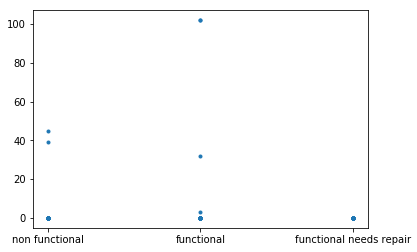

In [40]:
plt.plot( data.status_group[randindexes], data.num_private[randindexes],'.')

So it doesnt really matter it seems as the higher values of num_private column seems to be outliers and have no signifcant correlation with status groups

In [43]:
data =data.drop('num_private', axis =1)

In [47]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


(array([421.,  92.,  43.,  61.,  77., 127.,  98.,  49.,  24.,   8.]),
 array([ -40. ,  202.8,  445.6,  688.4,  931.2, 1174. , 1416.8, 1659.6,
        1902.4, 2145.2, 2388. ]),
 <a list of 10 Patch objects>)

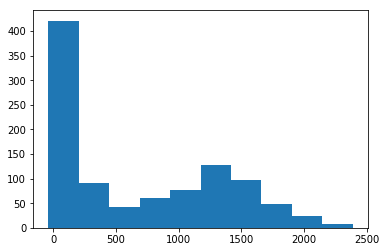

In [48]:
plt.hist(data.gps_height[randindexes])

Seems like quite a few zeros out there lets check the counts for different heights

In [53]:
np.unique(data.gps_height, return_counts=True)

(array([ -90,  -63,  -59,  -57,  -55,  -54,  -53,  -52,  -51,  -50,  -49,
         -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,
         -37,  -36,  -35,  -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,
         -26,  -25,  -24,  -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,
         -15,  -14,  -13,  -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,
          -4,   -3,   -2,   -1,    0,    1,    2,    3,    4,    5,    6,
           7,    8,    9,   10,   11,   12,   13,   14,   15,   16,   17,
          18,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
          29,   30,   31,   32,   33,   34,   35,   36,   37,   38,   39,
          40,   41,   42,   43,   44,   45,   46,   47,   48,   49,   50,
          51,   52,   53,   54,   55,   56,   57,   58,   59,   60,   61,
          62,   63,   64,   65,   66,   67,   68,   69,   70,   71,   72,
          73,   74,   75,   76,   77,   78,   79,   80,   81,   82,   83,
          84,   85,   86,   87,   88, 

So the close to zero spikes are actually for negative values. Lets check a plot of these with target

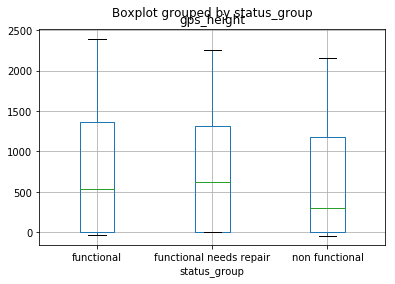

In [67]:
data.iloc[randindexes,:].boxplot('gps_height', by= 'status_group')

So there is not much of a difference for three categories for values of gps_height. We cannot rule this column out. Lets keep it for the model and we need this feature to be ivestigated in detail.

In [68]:
np.unique(data.basin, return_counts=True )

(array(['Internal', 'Lake Nyasa', 'Lake Rukwa', 'Lake Tanganyika',
        'Lake Victoria', 'Pangani', 'Rufiji', 'Ruvuma / Southern Coast',
        'Wami / Ruvu'], dtype=object),
 array([ 7785,  5085,  2454,  6432, 10248,  8940,  7976,  4493,  5987]))

So this is a fairly distributed categorical variable and we need to keep it to check its affect on the label`

In [76]:
data["subvillage"] = data["subvillage"].astype(str)


In [75]:
np.unique(data.subvillage, return_counts=True)[0].shape[0]

19288

It does look like that there are about 20000 unique subvillages that are present in data set. So again does not make sense to get into each category of village and train data of 60L rows. So removing this column as well.

In [77]:
data = data.drop('subvillage', axis=1)

In [78]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Now lets investigate region and region_code; And see if they represent same thing. 

In [80]:
data[['region','region_code']][:10]

,region,region_code
0,Iringa,11
1,Mara,20
2,Manyara,21
3,Mtwara,90
4,Kagera,18
5,Tanga,4
6,Shinyanga,17
7,Shinyanga,17
8,Tabora,14
9,Kagera,18


It seems like the region_code represents the region. Lets again confirm this by checking unique values

In [84]:
data['region'] = data['region'].astype(str)
data['region_code'] = data['region_code'].astype(str)
np.unique(data[['region','region_code']], return_counts=True)[0].shape[0]

(array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
        '2', '20', '21', '24', '3', '4', '40', '5', '6', '60', '7', '8',
        '80', '9', '90', '99', 'Arusha', 'Dar es Salaam', 'Dodoma',
        'Iringa', 'Kagera', 'Kigoma', 'Kilimanjaro', 'Lindi', 'Manyara',
        'Mara', 'Mbeya', 'Morogoro', 'Mtwara', 'Mwanza', 'Pwani', 'Rukwa',
        'Ruvuma', 'Shinyanga', 'Singida', 'Tabora', 'Tanga'], dtype=object),
 array([2201, 2640, 5300, 4639, 2093, 1979, 1808, 2816, 5011, 3324, 3047,
        3024, 1969, 1583,  326, 4379, 2513,    1, 4040, 1609, 1025,  805,
         300, 1238,  390,  917,  423, 3350,  805, 2201, 5294, 3316, 2816,
        4379, 1546, 1583, 1969, 4639, 4006, 1730, 3102, 2635, 1808, 2640,
        4982, 2093, 1959, 2547]))

In [85]:
np.unique(data[['region','region_code']], return_counts=True)[0].shape[0]

48

Now lets check individually

In [86]:
np.unique(data[['region']], return_counts=True)

(array(['Arusha', 'Dar es Salaam', 'Dodoma', 'Iringa', 'Kagera', 'Kigoma',
        'Kilimanjaro', 'Lindi', 'Manyara', 'Mara', 'Mbeya', 'Morogoro',
        'Mtwara', 'Mwanza', 'Pwani', 'Rukwa', 'Ruvuma', 'Shinyanga',
        'Singida', 'Tabora', 'Tanga'], dtype=object),
 array([3350,  805, 2201, 5294, 3316, 2816, 4379, 1546, 1583, 1969, 4639,
        4006, 1730, 3102, 2635, 1808, 2640, 4982, 2093, 1959, 2547]))

In [87]:
np.unique(data[['region']], return_counts=True)[0].shape[0]

21

In [89]:
print(np.unique(data[['region_code']], return_counts=True))
np.unique(data[['region_code']], return_counts=True)[0].shape[0]

(array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '24', '3', '4', '40', '5', '6', '60', '7', '8',
       '80', '9', '90', '99'], dtype=object), array([2201, 2640, 5300, 4639, 2093, 1979, 1808, 2816, 5011, 3324, 3047,
       3024, 1969, 1583,  326, 4379, 2513,    1, 4040, 1609, 1025,  805,
        300, 1238,  390,  917,  423]))


27

The unique values of columns show different results so we may need to investigate this.

In [107]:
for region in np.unique(data[['region']], return_counts=True)[0]:
    print(data[['region','region_code']].iloc[np.where(data.region==region)[0],][:10])

     region region_code
35   Arusha           2
44   Arusha           2
57   Arusha           2
63   Arusha           2
77   Arusha           2
82   Arusha           2
110  Arusha           2
111  Arusha           2
123  Arusha           2
131  Arusha           2
            region region_code
145  Dar es Salaam           7
152  Dar es Salaam           7
393  Dar es Salaam           7
417  Dar es Salaam           7
428  Dar es Salaam           7
503  Dar es Salaam           7
567  Dar es Salaam           7
636  Dar es Salaam           7
702  Dar es Salaam           7
797  Dar es Salaam           7
     region region_code
30   Dodoma           1
37   Dodoma           1
89   Dodoma           1
114  Dodoma           1
242  Dodoma           1
262  Dodoma           1
264  Dodoma           1
295  Dodoma           1
322  Dodoma           1
329  Dodoma           1
    region region_code
0   Iringa          11
16  Iringa          11
17  Iringa          11
19  Iringa          11
20  Iringa      

Clearly from this result, region_codes 4, 14,13,17,10,15,6,19,90,5, 12,20,21,80,3,16,18,11,1,7,2 are valid and rest seems to be invalid

In [115]:
data.loc[data.region=='Lindi','region_code']=80

In [117]:
data.loc[data.region=='Mtwara','region_code']=90

In [118]:
data.loc[data.region=='Pwani','region_code']=90

Now lets check count again

In [121]:
data['region_code']= data['region_code'].astype(str)
print(np.unique(data[['region_code']], return_counts=True))
np.unique(data[['region_code']], return_counts=True)[0].shape[0]

(array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '24', '3', '4', '5', '7', '80', '90'],
      dtype=object), array([2201, 2640, 5300, 4639, 2093, 1979, 1808, 2816, 5011, 3316, 3047,
       3024, 1969, 1583,  326, 4379, 2513, 4040,  805, 1546, 4365]))


21

Okay so now we have correct region codes for regions as both the columns represent same thing. Lets remove the region variable and just keep region_code`

In [122]:
data = data.drop('region',axis =1) 

In [123]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Lets check region_code district code, lga and ward as they correspond to geographay related locations and see if we can remove one or more features

In [127]:
data[['region_code', 'district_code', 'lga','ward']]

,region_code,district_code,lga,ward
0,11,5,Ludewa,Mundindi
1,20,2,Serengeti,Natta
2,21,4,Simanjiro,Ngorika
3,90,63,Nanyumbu,Nanyumbu
4,18,1,Karagwe,Nyakasimbi
5,4,8,Mkinga,Moa
6,17,3,Shinyanga Rural,Samuye
7,17,3,Kahama,Chambo
8,14,6,Tabora Urban,Itetemia
9,18,1,Karagwe,Kaisho


In [ ]:
It seems there is no correlation between these columns. So they need to be worked upon separately. 

In [131]:
data['district_code']= data['district_code'].astype(str)
np.unique(data['district_code'], return_counts=True)

(array(['0', '1', '13', '2', '23', '3', '30', '33', '4', '43', '5', '53',
        '6', '60', '62', '63', '67', '7', '8', '80'], dtype=object),
 array([   23, 12203,   391, 11173,   293,  9998,   995,   874,  8999,
          505,  4356,   745,  4074,    63,   109,   195,     6,  3343,
         1043,    12]))

So majority have 1 2 and  3 as district codes. The variable needs to be investigated within the model. Lets see have a look at 1000 random district codes with label



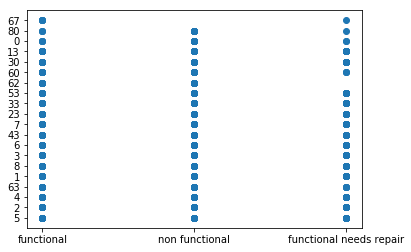

In [136]:
plt.scatter( data.status_group, data.district_code)

The results seems all over the place; with no clear relationship. So it might not be a good idea to remove this column as of now.

Now lets check lga column which means Geographic location

In [137]:
np.unique(data.lga, return_counts=True)

(array(['Arusha Rural', 'Arusha Urban', 'Babati', 'Bagamoyo', 'Bahi',
        'Bariadi', 'Biharamulo', 'Bukoba Rural', 'Bukoba Urban', 'Bukombe',
        'Bunda', 'Chamwino', 'Chato', 'Chunya', 'Dodoma Urban', 'Geita',
        'Hai', 'Hanang', 'Handeni', 'Igunga', 'Ilala', 'Ileje', 'Ilemela',
        'Iramba', 'Iringa Rural', 'Kahama', 'Karagwe', 'Karatu', 'Kasulu',
        'Kibaha', 'Kibondo', 'Kigoma Rural', 'Kigoma Urban', 'Kilindi',
        'Kilolo', 'Kilombero', 'Kilosa', 'Kilwa', 'Kinondoni', 'Kisarawe',
        'Kishapu', 'Kiteto', 'Kondoa', 'Kongwa', 'Korogwe', 'Kwimba',
        'Kyela', 'Lindi Rural', 'Lindi Urban', 'Liwale', 'Longido',
        'Ludewa', 'Lushoto', 'Mafia', 'Magu', 'Makete', 'Manyoni',
        'Masasi', 'Maswa', 'Mbarali', 'Mbeya Rural', 'Mbinga', 'Mbozi',
        'Mbulu', 'Meatu', 'Meru', 'Misenyi', 'Missungwi', 'Mkinga',
        'Mkuranga', 'Monduli', 'Morogoro Rural', 'Morogoro Urban',
        'Moshi Rural', 'Moshi Urban', 'Mpanda', 'Mpwapwa', 'Mtwara Rural

In [138]:
np.unique(data.lga, return_counts=True)[0].shape[0]

125

So 125 categories with fairly distributed number of occurrences of each category -- hints towards keeping this variable as an input to the model.

Now ward column which again denotes some geographic location

In [139]:
np.unique(data.ward, return_counts=True)

(array(['Aghondi', 'Akheri', 'Arash', 'Arri', 'Arusha Chini', 'Babayu',
        'Badi', 'Badugu', 'Bahi', 'Balangidalalu', 'Baleni', 'Bangata',
        'Bangwe', 'Baraa', 'Bargish', 'Bariadi', 'Barikiwa', 'Barray',
        'Bashay', 'Bashinet', 'Bassodesh', 'Bassotu', 'Bendera', 'Berega',
        'Berege', 'Bereko', 'Bigwa', 'Biharamulo Urban', 'Biirabo',
        'Binagi', 'Biro', 'Bitale', 'Boma', "Boma la ng'ombe",
        'Bombambili', 'Bombo', 'Bonde la Songwe', 'Bondeni', 'Bonga',
        'Bubiki', 'Buchambi', 'Budakwa', 'Budekwa', 'Budushi', 'Bugandika',
        'Buganguzi', 'Bugarama', 'Bugene', 'Bugogwe', 'Bugomora', 'Bugoro',
        'Bugorora', 'Bugwema', 'Buhanda businde', 'Buhemba',
        'Buhendangabo', 'Buhigwe', 'Buhingo', 'Buhongwa', 'Buhoro',
        'Bujashi', 'Bujonde', 'Bujugo', 'Bukabwa', 'Bukanda', 'Bukembe',
        'Bukene', 'Bukiko', 'Bukima', 'Bukindo', 'Bukiriro', 'Bukoko',
        'Bukoli', 'Bukombe', 'Bukome', 'Bukondo', 'Bukongo', 'Bukumbi',
        'Buk

In [140]:
np.unique(data.ward, return_counts=True)[0].shape[0]

2092

2100 categories. Lets remove this column for now.

In [141]:
data = data.drop('ward', axis=1)

In [142]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Now lets investigate **recorded_by** variable

In [143]:
np.unique(data.recorded_by, return_counts=True)

(array(['GeoData Consultants Ltd'], dtype=object), array([59400]))

All values are same for this column. so this does not add any value to the outcome. Lets remove this as well.

In [145]:
data = data.drop('recorded_by', axis=1)

Now lets investigate **scheme_management** variable

In [148]:
data["scheme_management"]= data["scheme_management"].astype(str)
np.unique(data.scheme_management, return_counts=True)

(array(['Company', 'None', 'Other', 'Parastatal', 'Private operator',
        'SWC', 'Trust', 'VWC', 'WUA', 'WUG', 'Water Board',
        'Water authority', 'nan'], dtype=object),
 array([ 1061,     1,   766,  1680,  1063,    97,    72, 36793,  2883,
         5206,  2748,  3153,  3877]))

There are quite a few nans and one None. Lets replace none with nan and then we will handle nan values later for all data columns.

In [167]:
data.loc[data.scheme_management=='None','scheme_management'] = 'nan'

In [168]:
data["scheme_management"]= data["scheme_management"].astype(str)
np.unique(data.scheme_management, return_counts=True)

(array(['Company', 'Other', 'Parastatal', 'Private operator', 'SWC',
        'Trust', 'VWC', 'WUA', 'WUG', 'Water Board', 'Water authority',
        'nan'], dtype=object),
 array([ 1061,   766,  1680,  1063,    97,    72, 36793,  2883,  5206,
         2748,  3153,  3878]))